In [1]:

import numpy as np 
import pandas as pd
df = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv')

In [2]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [5]:
missing_values = df.isnull().sum()
print(missing_values)


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


Cleaning data to ensure everything is in numerical or boolean form.

In [6]:
df = pd.get_dummies(df, columns=['lunch', 'test preparation course','gender', 'race/ethnicity', 'parental level of education'], drop_first=True)
df.head()

,math score,reading score,writing score,lunch_standard,test preparation course_none,gender_male,race/ethnicity_group B,race/ethnicity_group C,race/ethnicity_group D,race/ethnicity_group E,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school
0,72,72,74,True,True,False,True,False,False,False,True,False,False,False,False
1,69,90,88,True,False,False,False,True,False,False,False,False,False,True,False
2,90,95,93,True,True,False,True,False,False,False,False,False,True,False,False
3,47,57,44,False,True,True,False,False,False,False,False,False,False,False,False
4,76,78,75,True,True,True,False,True,False,False,False,False,False,True,False


       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


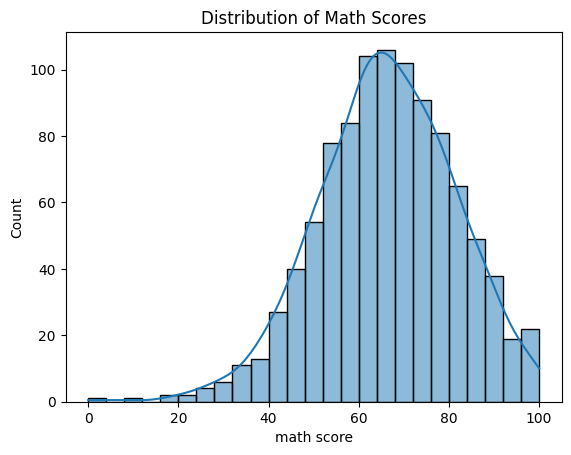

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


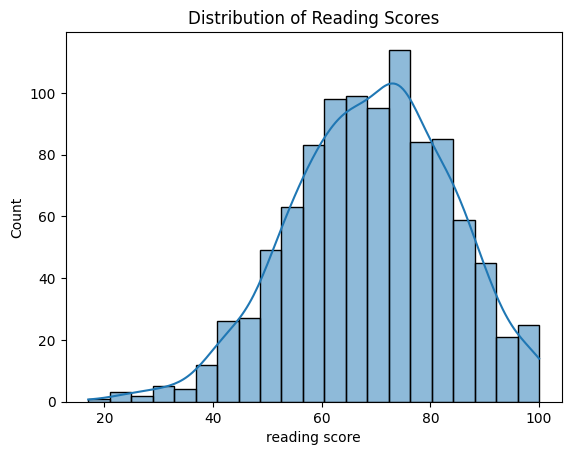

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


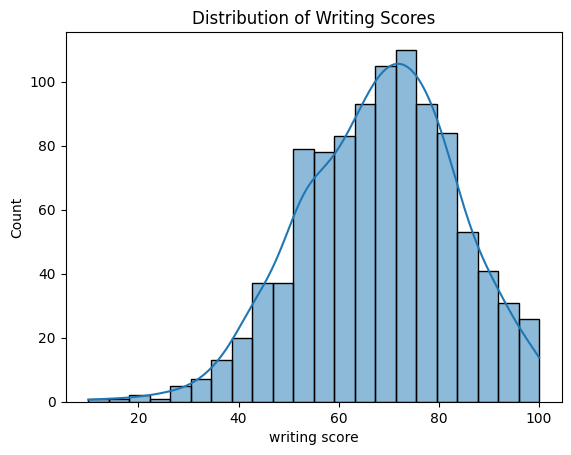

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
print(df.describe())

sns.histplot(df['math score'], kde=True)
plt.title('Distribution of Math Scores')
plt.show()

sns.histplot(df['reading score'], kde=True)
plt.title('Distribution of Reading Scores')
plt.show()

sns.histplot(df['writing score'], kde=True)
plt.title('Distribution of Writing Scores')
plt.show()

Use a heatmap to try see relationship between different features to see which are best for prediction.

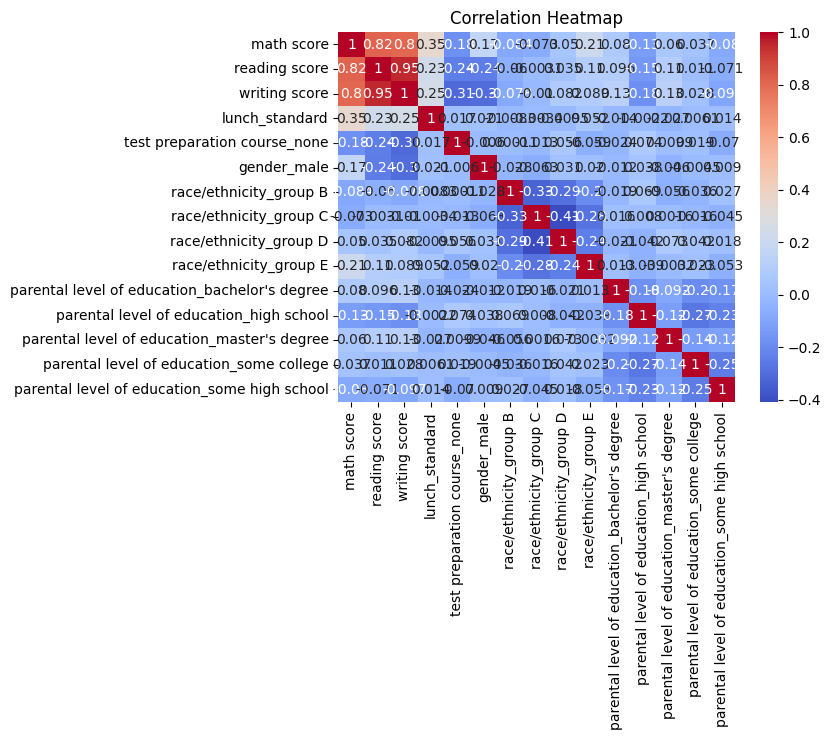

In [8]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [9]:
print(corr['math score'].sort_values(ascending=False))
print(corr['reading score'].sort_values(ascending=False))
print(corr['writing score'].sort_values(ascending=False))

math score                                       1.000000
reading score                                    0.817580
writing score                                    0.802642
lunch_standard                                   0.350877
race/ethnicity_group E                           0.205855
gender_male                                      0.167982
parental level of education_bachelor's degree    0.079664
parental level of education_master's degree      0.060417
race/ethnicity_group D                           0.050071
parental level of education_some college         0.037056
race/ethnicity_group C                          -0.073387
parental level of education_some high school    -0.079852
race/ethnicity_group B                          -0.084250
parental level of education_high school         -0.128725
test preparation course_none                    -0.177702
Name: math score, dtype: float64
reading score                                    1.000000
writing score                          

In [10]:
from sklearn.model_selection import train_test_split


X = df.drop(['math score'], axis=1)  
y = df['math score']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R-squared: {r2}")


Mean Absolute Error: 4.214763142474852
R-squared: 0.8804332983749564


In [12]:
from sklearn.ensemble import RandomForestRegressor


rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf}")
print(f"Random Forest R-squared: {r2_rf}")


Random Forest MAE: 4.698689285714286
Random Forest R-squared: 0.850938337575748
